### **Statistical Learning - lab 1**


Three purposes of this lab:

[**a. Recall already known python functions learned in the previous course**](#recall)

[**b. Learn basic statistical tests learned in the <i>statistical inference</i> course**](#basic)

[**c. Learn nonparametric tests in python**](#nonp)

Let's start with some reminders of basic python and matehmatics


**Basic mathematics in python**
<a id='recall'></a>


In [1]:
a=4
b=5
print(a+b)
print(a*b)
print(a**b)
print(type(a))

print(a/b)
print(type(a/b))


c=(float(a)/b)
print(c)
print(type(c))

9
20
1024
<class 'int'>
0.8
<class 'float'>
0.8
<class 'float'>



**More mathematics**


In [2]:
import math  #  This command will import all functions from the math module.
print(math.sqrt(a))  # this is executed!
print(math.factorial(a))

# n choose k (10 choose 4) 
# 10 over 4
c=10
(math.factorial(c))/((math.factorial(a))*(math.factorial(c-a)))


2.0
24


210.0

Binomial calculations

In [3]:
# what is the chance to get six successes when n=6?
from scipy import stats
stats.binom_test(6, n=6, p=0.5, alternative='greater')
stats.binom_test(6, n=6, p=0.5, alternative='two-sided')


0.03125

**And pandas**

In [4]:
import pandas as pd # import the pandas library with the convention alias "pd"
import numpy as np  # import the numpy library with the convention alias "np"

In [5]:
df = pd.read_csv("salaries.csv") 
df.head(20)


FileNotFoundError: [Errno 2] No such file or directory: 'salaries.csv'

**Let's do some basic statistics**
<a id='basic'></a>


In [ ]:
of_df1 = pd.crosstab(df.RACE, columns=['count'])
of_df1
#of_df1 = pd.crosstab(df.GENDER, columns=['count'])
#of_df1
#of_df2 = pd.crosstab(df.RACE, df.GENDER, margins='True')
#of_df2

col_0,count
RACE,
Black,35
White,267


*Descriptive statistics*

In [ ]:
df['SALARY'].count()
df['SALARY'].mean()
df['SALARY'].median()
df['SALARY'].max()
df['SALARY'].min()
df['SALARY'].std()
df['SALARY'].describe()


*The groupby approach (for interval features)*

In [ ]:
groupby_gender = df.groupby('GENDER')
groupby_gender.mean()

#groupby_race = df.groupby('RACE')
#groupby_race.mean()

#groupby_mar = df.groupby('MARTIAL')
#groupby_mar.mean()


*Basic plots*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31956fd410>,
      dtype=object)

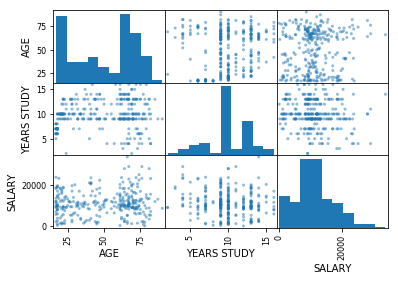

In [ ]:
from pandas import plotting
plotting.scatter_matrix(df[['AGE', 'YEARS STUDY', 'SALARY']])   


**Let's test if the salaries are normally distributed**

1. Let's draw a histogram

(array([35., 29., 77., 77., 32., 27., 16.,  4.,  4.,  1.]),
 array([  153. ,  3520.4,  6887.8, 10255.2, 13622.6, 16990. , 20357.4,
        23724.8, 27092.2, 30459.6, 33827. ]),
 <a list of 10 Patch objects>)

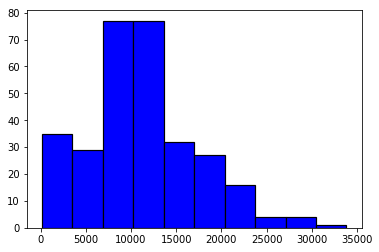

In [ ]:
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

plt.hist(df.SALARY, color='b',edgecolor='black', linewidth=1.2)


does it look as normally distributed?


2. we can check for normality using the z-test. This is a statistically test in which:

*   H0 - the distribution is normal
*   H1 - the distribution is not normal
בדיקה האם התפלגות היא התלפגות נורמלית לפי ערך שמכניסים

In [ ]:
from statsmodels.stats import weightstats as stests

smean = df['SALARY'].mean()
print(smean)

# H0 if normal, H1 otherwise
ztest ,pval = stests.ztest(df['SALARY'], x2=None, value=smean)

print(float(pval))
print(float(ztest))

# what will happen if we change the value to an exreme value (say -100000 or 40000) - try it


11300.288079470198
1.0
0.0


**Parametric statistical tests for comparisons**

*Standard statistical table*

In [ ]:
from scipy import stats

# Z to phi (probability)
stats.norm.cdf(1.92)

# phi to Z (statistics)
stats.norm.ppf(.95)


1.6448536269514722

*1-sample t-test* (check if sample has a sprcific mean)


האם ההתפלגות מתפלגת T 

In [ ]:
import statistics
from numpy import array

x=array([10,20,30,40,50])
stats.ttest_1samp(x, statistics.mean(x))
#stats.ttest_1samp(x+8, statistics.mean(x))

# what will happen here?
# sal=(df['SALARY'])
#stats.ttest_1samp(sal, statistics.mean(sal))


*Let's compare the salaries of men and women*

First let's plot a boxplot to visualzie the differences


Text(0.5,1,'SALARY by GENDER')

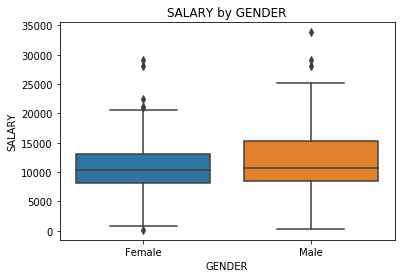

In [ ]:
import seaborn as sns
sns.boxplot(x="GENDER", y="SALARY",data=df).set_title('SALARY by GENDER')


Then let's apply t-test to assess the difference (Unpaired t-test)

*   notice it returns a two-sided test p-value


In [ ]:
from scipy import stats
df.loc[df['AGE'] < 50]
females = df.loc[df['GENDER'] == 'Female']
males = df.loc[df['GENDER'] == 'Male']

fes = females['SALARY']
mes = males['SALARY']
print(females)
stats.ttest_ind(fes,mes) 

Paired t-test in python

*   notice it returns a two-sided test p-value


In [ ]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data2 = [-142, 432, 938, 729, 846, 157, 500, 1183, 1075, 169]

stat, p = stats.ttest_rel(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

*Let's compare the salaries of participants from different martial statuses (ANOVA)*


In [ ]:
groupby_gender = df.groupby('MARTIAL')
groupby_gender.mean()

sns.boxplot(x="MARTIAL", y="SALARY",data=df).set_title('SALARY by MARTIAL')

In [ ]:
wid = df.loc[df['MARTIAL'] == 'Widowed']
mar = df.loc[df['MARTIAL'] == 'Married']
nmar = df.loc[df['MARTIAL'] == 'Never-married']
div = df.loc[df['MARTIAL'] == 'Divorced']
div
div['SALARY']
stat, p = stats.f_oneway(wid['SALARY'], mar['SALARY'],nmar['SALARY'],div['SALARY'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

NameError: ignored

## **Class Exercise (1)**: 
*make sure there is no difference*

In [ ]:
stat, p = stats.ttest_ind(wid['SALARY'], mar['SALARY'])
print(p)
stat, p = stats.ttest_ind(wid['SALARY'], nmar['SALARY'])
print(p)
stat, p = stats.ttest_ind(wid['SALARY'], div['SALARY'])
print(p)
stat, p = stats.ttest_ind(mar['SALARY'], nmar['SALARY'])
print(p)
#and so on....


0.2056557575915693
0.3366144209952484
0.26630893344027234
0.6579932300895486


# **Non-parametric tests in pandas**
<a id='nonp'></a>


**Chi-square test (contingency tables)**

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
table = [[10, 20, 30],[9996,  999,  179]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

**Wilcoxon test for paired samples**

In [ ]:
data1 = [0.8, -2.8, 0.1, -0.9, -0.1, -1.4, 0.360, -1.8, -1.7, -1.9, 2.0, -3.2]
data2 = [0.1, 2.3, 0.2, 9.4, -0.1, 2.4, -3.0, -1.4, 1.6, 8.69, 3.1, 4.2]

stat, p = stats.wilcoxon(data1,data2,zero_method='wilcox')

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

**Wilcoxon (Mann Whitney) test for non-paired samples (equivalent to wilcoxson)**

In [ ]:
group1 = [1, 5 ,7 ,3 ,5 ,8 ,34 ,1 ,3 ,5 ,200, 3]
group2 = [10, 18, 11, 12, 15, 19, 9, 17, 1, 22, 9, 8]
group3 = [1, 5 ,7 ,3 ,5 ,8 ,34 ,1 ,3 ,5 ,200, 3]

stat, p = stats.mannwhitneyu(group1, group2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


##**Class Exercise (2)**: 
*Check the difference between men's and women's salaries.*

*What are the differences between the parametric and the non-parametric tests?*

In [ ]:
stat, p = stats.mannwhitneyu(fes, mes)
print("non-parametric test results:")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution\n')
else:
	print('Probably different distributions\n')
 
print("parametric test results:",stats.ttest_ind(fes,mes))

non-parametric test results:
stat=10407.500, p=0.096
Probably the same distribution

('parametric test results:', Ttest_indResult(statistic=-1.962279105783998, pvalue=0.05065412288354052))


**Kolmogorov Smirnov test**

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(group1, group2)


**Friedman test**

In [ ]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869, 4]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169, 4]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204, -1]
data4 = [-1.142, 0.432, 0.938, 0.729, 0.846, 0.157, 0.500, 1.183, 1.075, 0.169, 4]

stat, p = friedmanchisquare(data1, data2, data3)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=0.884, p=0.643
Probably the same distribution


##**Class Exercise (3)**: 
*Check the difference between data1, data2, data4.*

*Which pair(s) make(s) the difference?*

In [ ]:
stat, p = friedmanchisquare(data1, data2, data4)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
print("pairs testing:\n")
stat, p = stats.wilcoxon(data1,data2,zero_method='wilcox')
print("pair 1 and 2")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat, p = stats.wilcoxon(data1,data4,zero_method='wilcox')
print("pair 1 and 4")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
stat, p = stats.wilcoxon(data4,data2,zero_method='wilcox')
print("pair 2 and 4")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

**Kruskal-Wallis test**

In [ ]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204, 0.23, 0.98]

stat, p = kruskal(data1, data2,data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

##**Class Exercise (4)**: 
*Check the difference between the parameteric and the non-parameteric test, regarding the salaries according to the martial status.*

In [ ]:
from scipy.stats import kruskal
wid = df.loc[df['MARTIAL'] == 'Widowed']
mar = df.loc[df['MARTIAL'] == 'Married']
nmar = df.loc[df['MARTIAL'] == 'Never-married']
div = df.loc[df['MARTIAL'] == 'Divorced']
div
div['SALARY']
stat, p = stats.f_oneway(wid['SALARY'], mar['SALARY'],nmar['SALARY'],div['SALARY'])
print("result for parametric test: ",p)
print("result for non-parametric test: \n")

stat, p = kruskal(wid['SALARY'], mar['SALARY'],nmar['SALARY'],div['SALARY'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

('result for parametric test: ', 0.530506512761904)
result for non-parametric test: 

stat=0.892, p=0.827
Probably the same distribution


**Cochran test**

In [ ]:
from statsmodels.sandbox.stats.runs import cochrans_q

tasks = array([[0,1,1,0,1,0,0,1,0,0,0,0],
                      [1,1,1,0,0,1,0,1,1,1,1,1],
                      [0,0,1,0,0,1,0,0,0,0,0,0]])


tasks = array([[0,1,0,1,0,1],[1,1,1,1,1,1],
                      [0,0,0,0,0,0],[1,1,1,1,1,1],[1,1,1,1,1,1],[0,0,0,1,1,1],
                      [1,1,1,1,1,1],[0,0,0,1,1,0],[0,0,0,0,0,0]])

#    df = pd.DataFrame(tasks.T, columns = ['Task1', 'Task2', 'Task3'])
    
stat, p = cochrans_q(tasks)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
